In [130]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

## Arabica Coffee Bean Data

In [613]:
# read data of arabica coffee beans into pandas dataframe from csv file
arabica = pd.read_csv('https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_ratings_raw.csv')

In [132]:
arabica.head()

,Unnamed: 0,quality_score,view_certificate_1,view_certificate_2,Cupping Protocol and Descriptors,View Green Analysis Details,Request a Sample,Species,Owner,Country of Origin,...,Quakers,Color,Category Two Defects,NA.3,Expiration,Certification Body,Certification Address,Certification Contact,Unnamed: 51,Notes
0,0,90.58,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,...,0.0,Green,0 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
1,1,89.92,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,...,0.0,Green,1 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
2,2,89.75,NaN,NaN,NaN,NaN,NaN,Arabica,Grounds for Health Admin,Guatemala,...,0.0,NaN,0 full defects,NaN,"May 31st, 2011",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100,NaN,NaN
3,3,89.00,NaN,NaN,NaN,NaN,NaN,Arabica,Yidnekachew Dabessa,Ethiopia,...,0.0,Green,2 full defects,NaN,"March 25th, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
4,4,88.83,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,...,0.0,Green,2 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN


In [133]:
arabica.tail()

,Unnamed: 0,quality_score,view_certificate_1,view_certificate_2,Cupping Protocol and Descriptors,View Green Analysis Details,Request a Sample,Species,Owner,Country of Origin,...,Quakers,Color,Category Two Defects,NA.3,Expiration,Certification Body,Certification Address,Certification Contact,Unnamed: 51,Notes
1307,1306,67.92,NaN,NaN,NaN,NaN,NaN,Arabica,Myriam Kaplan-Pasternak,Haiti,...,0.0,Blue-Green,16 full defects,NaN,"May 24th, 2013",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100,NaN,NaN
1308,1307,63.08,NaN,NaN,NaN,NaN,NaN,Arabica,"Exportadora Atlantic, S.A.",Nicaragua,...,0.0,Green,5 full defects,NaN,"June 6th, 2018",Instituto Hondureño del Café,Laboratorio de Control de Calidad de Café ( CN...,Ramon Reyes - + 504 9693-9042,NaN,NaN
1309,1308,59.83,NaN,NaN,NaN,NaN,NaN,Arabica,Juan Luis Alvarado Romero,Guatemala,...,0.0,Green,4 full defects,NaN,"May 24th, 2013",Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Juan Luis Alvarado Romero - +502 2311.1951,NaN,NaN
1310,1309,43.13,NaN,NaN,NaN,NaN,NaN,Arabica,Ethiopia Commodity Exchange,Ethiopia,...,0.0,NaN,0 full defects,NaN,"June 18th, 2011",Ethiopia Commodity Exchange,"Al-Sam Tower 2, 3rd Floor Lideta, Addis Ababa,...",- +251 11 554 7001,NaN,NaN
1311,1310,0.00,NaN,NaN,NaN,NaN,NaN,Arabica,Bismarck Castro,Honduras,...,0.0,Green,2 full defects,NaN,"April 28th, 2018",Instituto Hondureño del Café,Laboratorio de Control de Calidad de Café ( CN...,Ramon Reyes - + 504 9693-9042,NaN,NaN


In [180]:
# review the dtypes and number of null values per column
arabica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 53 columns):
Unnamed: 0                          1312 non-null int64
quality_score                       1312 non-null float64
view_certificate_1                  0 non-null float64
view_certificate_2                  0 non-null float64
Cupping Protocol and Descriptors    0 non-null float64
View Green Analysis Details         0 non-null float64
Request a Sample                    0 non-null float64
Species                             1312 non-null object
Owner                               1305 non-null object
Country of Origin                   1311 non-null object
Farm Name                           956 non-null object
Lot Number                          270 non-null object
Mill                                1005 non-null object
ICO Number                          1166 non-null object
Company                             1102 non-null object
Altitude                            1094 non-null 

In [614]:
# drop unneeded columns
arabica = arabica.drop(['Unnamed: 0', 'Species', 'view_certificate_1', 'view_certificate_2', 'ICO Number','Cupping Protocol and Descriptors', 'View Green Analysis Details', 'Request a Sample', 'Lot Number', 'NA', 'NA.1', 'NA.2', 'NA.3', 'Unnamed: 51', 'Notes', 'Certification Body', 'Certification Address', 'Certification Contact', 'Quakers', 'Total Cup Points'], axis=1)

In [175]:
arabica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 35 columns):
quality_score           1312 non-null float64
Species                 1312 non-null object
Owner                   1305 non-null object
Country of Origin       1311 non-null object
Farm Name               956 non-null object
Mill                    1005 non-null object
ICO Number              1166 non-null object
Company                 1102 non-null object
Altitude                1094 non-null object
Region                  1256 non-null object
Producer                1082 non-null object
Number of Bags          1312 non-null int64
Bag Weight              1312 non-null object
In-Country Partner      1312 non-null object
Harvest Year            1265 non-null object
Grading Date            1312 non-null object
Owner.1                 1305 non-null object
Variety                 1110 non-null object
Status                  1312 non-null object
Processing Method       1159 non-null o

In [615]:
arabica.columns

Index(['quality_score', 'Owner', 'Country of Origin', 'Farm Name', 'Mill',
       'Company', 'Altitude', 'Region', 'Producer', 'Number of Bags',
       'Bag Weight', 'In-Country Partner', 'Harvest Year', 'Grading Date',
       'Owner.1', 'Variety', 'Status', 'Processing Method', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup',
       'Sweetness', 'Cupper Points', 'Moisture', 'Category One Defects',
       'Color', 'Category Two Defects', 'Expiration'],
      dtype='object')

In [307]:
arabica.head()

,quality_score,Owner,Country of Origin,Farm Name,Mill,Company,Altitude,Region,Producer,Number of Bags,...,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Moisture,Category One Defects,Color,Category Two Defects,Expiration
0,90.58,metad plc,Ethiopia,METAD PLC,METAD PLC,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/GOYO,METAD PLC,300,...,8.42,10.0,10.0,10.0,8.75,12 %,0 full defects,Green,0 full defects,"April 3rd, 2016"
1,89.92,metad plc,Ethiopia,METAD PLC,METAD PLC,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/ALAKA,METAD PLC,300,...,8.42,10.0,10.0,10.0,8.58,12 %,0 full defects,Green,1 full defects,"April 3rd, 2016"
2,89.75,Grounds for Health Admin,Guatemala,"San Marcos Barrancas ""San Cristobal Cuch",NaN,NaN,1600 - 1800 m,NaN,NaN,5,...,8.42,10.0,10.0,10.0,9.25,0 %,0 full defects,NaN,0 full defects,"May 31st, 2011"
3,89.00,Yidnekachew Dabessa,Ethiopia,Yidnekachew Dabessa Coffee Plantation,Wolensu,Yidnekachew Debessa Coffee Plantation,1800-2200,Oromia,Yidnekachew Dabessa Coffee Plantation,320,...,8.25,10.0,10.0,10.0,8.67,11 %,0 full defects,Green,2 full defects,"March 25th, 2016"
4,88.83,metad plc,Ethiopia,METAD PLC,METAD PLC,METAD Agricultural Developmet plc,1950-2200,GUJI-HAMBELA/BISHAN FUGU,METAD PLC,300,...,8.33,10.0,10.0,10.0,8.58,12 %,0 full defects,Green,2 full defects,"April 3rd, 2016"


In [205]:
arabica.tail()

,quality_score,Owner,Country of Origin,Farm Name,Mill,Company,Altitude,Region,Producer,Number of Bags,...,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Moisture,Category One Defects,Color,Category Two Defects,Expiration
1307,67.92,Myriam Kaplan-Pasternak,Haiti,200 farms,COEB Koperativ Ekselsyo Basen (350 members),Haiti Coffee,~350m,"Department d'Artibonite , Haiti",COEB Koperativ Ekselsyo Basen,1,...,6.67,9.33,6.00,6.00,6.42,14 %,8 full defects,Blue-Green,16 full defects,"May 24th, 2013"
1308,63.08,"Exportadora Atlantic, S.A.",Nicaragua,Finca Las Marías,BENEFICIO ATLANTIC CONDEGA,Exportadora Atlantic S.A,1100,jalapa,Teófilo Narváez,550,...,6.08,6.00,6.00,6.00,6.17,13 %,1 full defects,Green,5 full defects,"June 6th, 2018"
1309,59.83,Juan Luis Alvarado Romero,Guatemala,FINCA EL LIMON,BENEFICIO SERBEN KM 21.5 CARRETERA A VILLA CAN...,"UNICAFE, S.A",4650,NUEVO ORIENTE ALDEA EL LIMON,WILLIAM ESTUARDO MARTINEZ PACHECO,275,...,6.67,8.00,1.33,1.33,6.67,10 %,0 full defects,Green,4 full defects,"May 24th, 2013"
1310,43.13,Ethiopia Commodity Exchange,Ethiopia,TEST,TEST,NaN,TEST,TEST,TEST,0,...,6.00,0.00,0.00,0.00,6.00,0 %,0 full defects,NaN,0 full defects,"June 18th, 2011"
1311,0.00,Bismarck Castro,Honduras,Los Hicaques,CIGRAH S.A. DE C.V.,CIGRAH S.A DE C.V,1400,Comayagua,Reinerio Zepeda,275,...,0.00,0.00,0.00,0.00,0.00,12 %,0 full defects,Green,2 full defects,"April 28th, 2018"


In [616]:
arabica['Moisture'] = arabica['Moisture'].str.strip(' %').astype(float)/100

In [617]:
arabica['Moisture'].dtype

dtype('float64')

In [618]:
arabica['Category One Defects'] = arabica['Category One Defects'].str.strip(' full defects').astype(int)

In [619]:
arabica['Category One Defects'].dtype

dtype('int64')

In [620]:
arabica['Category Two Defects'] = arabica['Category Two Defects'].str.strip(' full defects').astype(int)

In [621]:
arabica['Category Two Defects'].dtype

dtype('int64')

In [191]:
arabica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 34 columns):
quality_score           1312 non-null float64
Owner                   1305 non-null object
Country of Origin       1311 non-null object
Farm Name               956 non-null object
Mill                    1005 non-null object
ICO Number              1166 non-null object
Company                 1102 non-null object
Altitude                1094 non-null object
Region                  1256 non-null object
Producer                1082 non-null object
Number of Bags          1312 non-null int64
Bag Weight              1312 non-null object
In-Country Partner      1312 non-null object
Harvest Year            1265 non-null object
Grading Date            1312 non-null object
Owner.1                 1305 non-null object
Variety                 1110 non-null object
Status                  1312 non-null object
Processing Method       1159 non-null object
Aroma                   1312 non-null f

In [622]:
arabica['Country of Origin'].unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Cote d?Ivoire', nan, 'India'], dtype=object)

In [623]:
# check unique values under Region of samples from US Hawaii
arabica[arabica['Country of Origin'] == 'United States (Hawaii)'].Region.unique()

array(['Kona', 'KONA', nan], dtype=object)

In [624]:
# fill in region values including NaN as Kona as all of the Hawaii samples are from Kona
arabica.loc[arabica['Country of Origin'] == 'United States (Hawaii)', 'Region'] = 'Kona'

In [625]:
# check unique values under Region of samples from US Hawaii to confirm change was made
arabica[arabica['Country of Origin'] == 'United States (Hawaii)'].Region.unique()

array(['Kona'], dtype=object)

In [626]:
# rename United Republic of Tanzania to Tanzania
arabica.loc[arabica['Country of Origin'] =='Tanzania, United Republic Of', 'Country of Origin'] = 'Tanzania'

In [627]:
# rename Cote d?Ivoire to Cote d'Ivoire
arabica.loc[arabica['Country of Origin'] =='Cote d?Ivoire', 'Country of Origin'] = "Cote d'Ivoire"

In [628]:
# filled in the NaN value in Country of Origin with Columbia - searched up the country using the owner name
arabica.loc[arabica['Country of Origin'].isnull() == True, 'Country of Origin'] = 'Columbia'

In [629]:
origin_countries = arabica['Country of Origin'].unique().tolist()

In [630]:
origin_countries = sorted(origin_countries)

In [631]:
origin_countries

['Brazil',
 'Burundi',
 'China',
 'Colombia',
 'Columbia',
 'Costa Rica',
 "Cote d'Ivoire",
 'Ecuador',
 'El Salvador',
 'Ethiopia',
 'Guatemala',
 'Haiti',
 'Honduras',
 'India',
 'Indonesia',
 'Japan',
 'Kenya',
 'Laos',
 'Malawi',
 'Mauritius',
 'Mexico',
 'Myanmar',
 'Nicaragua',
 'Panama',
 'Papua New Guinea',
 'Peru',
 'Philippines',
 'Rwanda',
 'Taiwan',
 'Tanzania',
 'Thailand',
 'Uganda',
 'United States',
 'United States (Hawaii)',
 'United States (Puerto Rico)',
 'Vietnam',
 'Zambia']

## Temperature Data

In [632]:
temperatures = pd.read_csv('./data/TEMP_1991_2016.csv')

In [633]:
temperatures.head()

,Temperature - (Celsius),Year,Month,Country,ISO3
0,25.6309,1991,Jan,Brazil,BRA
1,25.9331,1991,Feb,Brazil,BRA
2,25.6195,1991,Mar,Brazil,BRA
3,25.3122,1991,Apr,Brazil,BRA
4,24.6685,1991,May,Brazil,BRA


In [634]:
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 5 columns):
Temperature - (Celsius)    10296 non-null float64
 Year                      10296 non-null int64
 Month                     10296 non-null object
 Country                   10296 non-null object
 ISO3                      10296 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 402.3+ KB


In [635]:
# function to convert celsius to fahrenheit
def celsius_to_fahrenheit(t):
    return t * 1.8 + 32

In [636]:
# pull out only the most recent set of temperature data for each country
temp = temperatures[temperatures[' Year'] == 2016]

In [637]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 300 to 10295
Data columns (total 5 columns):
Temperature - (Celsius)    396 non-null float64
 Year                      396 non-null int64
 Month                     396 non-null object
 Country                   396 non-null object
 ISO3                      396 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 18.6+ KB


In [638]:
# groupby country and average the temperatures
temperatures = temperatures.groupby(' Country').mean().reset_index()

In [639]:
# drop Year column
temperatures = temperatures.drop([' Year'], axis=1)

In [640]:
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 Country                   33 non-null object
Temperature - (Celsius)    33 non-null float64
dtypes: float64(1), object(1)
memory usage: 608.0+ bytes


In [641]:
# apply conversion function to temperature to convert from Celsius to Fahrenheit
temperatures['Temperature (F)'] = temperatures['Temperature - (Celsius)'].apply(lambda t: celsius_to_fahrenheit(t))
temperatures = temperatures.drop(['Temperature - (Celsius)'], axis=1)

In [642]:
temperatures.head()

,Country,Temperature (F)
0,Brazil,77.908733
1,Burundi,69.584427
2,China,44.670797
3,Colombia,76.521828
4,Costa Rica,76.858546


In [643]:
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 Country           33 non-null object
Temperature (F)    33 non-null float64
dtypes: float64(1), object(1)
memory usage: 608.0+ bytes


In [644]:
# list of values for us territories not in other tables: HI through worldclimate.org, PR through Wikipedia
us_temp = [{' Country': 'United States (Hawaii)', 'Temperature (F)': 76.1}, {' Country': 'United States (Puerto Rico)', 'Temperature (F)': 70}]

In [645]:
# add the list of dictionaries (us_temp) to the temperatures dataframe
temperatures = temperatures.append(us_temp)

In [646]:
temperatures.tail()

,Country,Temperature (F)
30,United States,45.710599
31,Vietnam,76.279672
32,Zambia,72.413266
0,United States (Hawaii),76.100000
1,United States (Puerto Rico),70.000000


In [647]:
# strip whitespace from each value under Country
temperatures[' Country'] = temperatures[' Country'].str.strip(' ')

## Add Temperature Data to Coffee Bean DataFrame

In [648]:
# add temperature dataframe to arabica dataframe based on country
arabica_temp = pd.merge_ordered(arabica, temperatures, left_on='Country of Origin', right_on=' Country', how='left', fill_method='ffill')

In [649]:
arabica_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1312 entries, 0 to 1311
Data columns (total 35 columns):
quality_score           1312 non-null float64
Owner                   1305 non-null object
Country of Origin       1312 non-null object
Farm Name               956 non-null object
Mill                    1005 non-null object
Company                 1102 non-null object
Altitude                1094 non-null object
Region                  1263 non-null object
Producer                1082 non-null object
Number of Bags          1312 non-null int64
Bag Weight              1312 non-null object
In-Country Partner      1312 non-null object
Harvest Year            1265 non-null object
Grading Date            1312 non-null object
Owner.1                 1305 non-null object
Variety                 1110 non-null object
Status                  1312 non-null object
Processing Method       1159 non-null object
Aroma                   1312 non-null float64
Flavor                  1312 non-null 

In [650]:
arabica_temp.head()

,quality_score,Owner,Country of Origin,Farm Name,Mill,Company,Altitude,Region,Producer,Number of Bags,...,Clean Cup,Sweetness,Cupper Points,Moisture,Category One Defects,Color,Category Two Defects,Expiration,Country,Temperature (F)
0,88.83,Ji-Ae Ahn,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,100,...,10.0,10.0,8.33,0.11,0,Bluish-Green,1,"September 3rd, 2014",Brazil,77.908733
1,86.92,NUCOFFEE,Brazil,Fazenda Kaquend,NaN,NUCOFFEE,1250m,South of Minas,Ralph Junqueira,3,...,10.0,10.0,7.92,0.12,0,Green,2,"December 2nd, 2012",Brazil,77.908733
2,86.42,NUCOFFEE,Brazil,Fazenda Recreio,NaN,NUCOFFEE,1300,Vale da Grama,Homero Texeira de Macedo Junior,29,...,10.0,10.0,8.00,0.12,0,Green,2,"December 2nd, 2012",Brazil,77.908733
3,86.17,Jacques Pereira Carneiro,Brazil,Pereira Estate Coffee,Cocarive,NaN,1.2,Sul de Minas - Carmo de Minas,Maria Rogeria Costa Pereira,300,...,10.0,10.0,8.08,0.08,0,NaN,2,"January 4th, 2012",Brazil,77.908733
4,86.17,Jacques Pereira Carneiro,Brazil,Pereira Estate Coffee,Cocarive,NaN,1.2,Sul de Minas - Carmo de Minas,Maria Rogeria Costa Pereira,300,...,10.0,10.0,8.17,0.01,0,NaN,3,"January 4th, 2012",Brazil,77.908733


In [651]:
arabica_temp.tail()

,quality_score,Owner,Country of Origin,Farm Name,Mill,Company,Altitude,Region,Producer,Number of Bags,...,Clean Cup,Sweetness,Cupper Points,Moisture,Category One Defects,Color,Category Two Defects,Expiration,Country,Temperature (F)
1307,82.83,"Sunvirtue Co., Ltd.",Vietnam,APOLLO Estate,APOLLO Estate,"Sunvirtue Co., Ltd.",1040,Vietnam Tutra,"Yeh, Li Chuan",3,...,10.0,10.0,7.92,0.11,11,Green,0,"January 18th, 2017",Vietnam,76.279672
1308,82.08,Royal Base Corporation,Vietnam,"Apollo Co., LTd.","Apollo Co., LTd.",Royal Base Corporation,1040M,Don Duong,"Apollo Co., LTd.",1,...,10.0,10.0,7.42,0.12,0,Green,2,"July 23rd, 2013",Vietnam,76.279672
1309,81.75,"Sunvirtue Co., Ltd.",Vietnam,APOLLO Estate,APOLLO Estate,"Sunvirtue Co., Ltd.",1040,Vietnam,Richard Yeh,1,...,10.0,10.0,8.00,0.12,0,Bluish-Green,0,"December 20th, 2016",Vietnam,76.279672
1310,80.17,"Sunvirtue Co., Ltd.",Vietnam,Apollo Estate,YES,"Sunvirtue Co., Ltd.",1550,Dala,"Yeh, Li Chuan",1,...,10.0,10.0,7.25,0.00,0,NaN,2,"May 9th, 2018",Vietnam,76.279672
1311,81.92,LUSSO LAB,Zambia,Mubuyu Munali,NaN,LUSSO COFFEE LAB,"1,000-1,500m",Mubuyu Estate,NaN,13,...,10.0,10.0,7.25,0.00,1,NaN,3,"June 20th, 2015",Zambia,72.413266


## Precipitation Data

In [369]:
# list of values for us territories not in other tables: HI through worldclimate.org, PR through Wikipedia
us_precip = [{'Country': 'United States (Hawaii)', 'Precipitation (mm)': 814.07}, {'Country': 'United States (Puerto Rico)', 'Precipitation (mm)': 1431}]

## Subset of Arabica Coffee Bean Data

In [264]:
arabica1 = arabica[['quality_score', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness', 'Cupper Points', 'Moisture', 'Category One Defects', 'Category Two Defects']]

In [213]:
arabica1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 14 columns):
quality_score           1312 non-null float64
Aroma                   1312 non-null float64
Flavor                  1312 non-null float64
Aftertaste              1312 non-null float64
Acidity                 1312 non-null float64
Body                    1312 non-null float64
Balance                 1312 non-null float64
Uniformity              1312 non-null float64
Clean Cup               1312 non-null float64
Sweetness               1312 non-null float64
Cupper Points           1312 non-null float64
Moisture                1312 non-null float64
Category One Defects    1312 non-null int64
Category Two Defects    1312 non-null int64
dtypes: float64(12), int64(2)
memory usage: 143.6 KB


In [214]:
arabica1.head()

,quality_score,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Moisture,Category One Defects,Category Two Defects
0,90.58,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,0.12,0,0
1,89.92,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,0.12,0,1
2,89.75,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,0.00,0,0
3,89.00,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,0.11,0,2
4,88.83,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,0.12,0,2


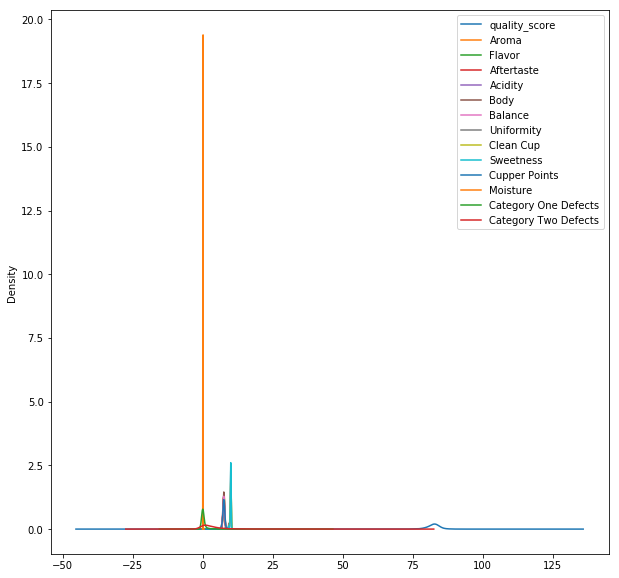

In [266]:
arabica1.plot.kde(figsize=(10,10))

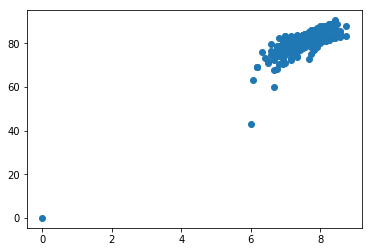

In [267]:
plt.scatter(arabica1['Balance'], arabica1.quality_score)

In [268]:
arabica1.describe()

,quality_score,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Moisture,Category One Defects,Category Two Defects
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,82.086212,7.562614,7.516913,7.396822,7.532614,7.516570,7.516349,9.825899,9.825625,9.895724,7.496723,0.088796,0.426067,3.589177
std,3.675542,0.380976,0.402017,0.406202,0.381879,0.361512,0.408316,0.621552,0.817449,0.596925,0.476228,0.048001,1.831754,5.349249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,81.170000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,0.090000,0.000000,0.000000
50%,82.500000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,0.110000,0.000000,2.000000
75%,83.670000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,0.120000,0.000000,4.000000
max,90.580000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,0.280000,31.000000,55.000000


In [270]:
arabica1.sort_values('quality_score', ascending=False)[:10]

,quality_score,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Moisture,Category One Defects,Category Two Defects
0,90.58,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.0,10.00,8.75,0.12,0,0
1,89.92,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.0,10.00,8.58,0.12,0,1
2,89.75,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.0,10.00,9.25,0.00,0,0
3,89.00,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.0,10.00,8.67,0.11,0,2
4,88.83,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.0,10.00,8.58,0.12,0,2
5,88.83,8.58,8.42,8.42,8.50,8.25,8.33,10.00,10.0,10.00,8.33,0.11,0,1
6,88.75,8.42,8.50,8.33,8.50,8.25,8.25,10.00,10.0,10.00,8.50,0.11,0,0
7,88.67,8.25,8.33,8.50,8.42,8.33,8.50,10.00,10.0,9.33,9.00,0.03,0,0
8,88.42,8.67,8.67,8.58,8.42,8.33,8.42,9.33,10.0,9.33,8.67,0.03,0,0
9,88.25,8.08,8.58,8.50,8.50,7.67,8.42,10.00,10.0,10.00,8.50,0.10,0,4


In [271]:
# drop last row which has mostly 0s and is an outlier
arabica1 = arabica1.drop([1311], axis=0)

In [233]:
arabica1.tail()

,quality_score,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Moisture,Category One Defects,Category Two Defects
1306,68.33,7.08,6.83,6.25,7.42,7.25,6.75,10.00,0.00,10.00,6.75,0.11,0,20
1307,67.92,6.75,6.58,6.42,6.67,7.08,6.67,9.33,6.00,6.00,6.42,0.14,8,16
1308,63.08,7.25,6.58,6.33,6.25,6.42,6.08,6.00,6.00,6.00,6.17,0.13,1,5
1309,59.83,7.50,6.67,6.67,7.67,7.33,6.67,8.00,1.33,1.33,6.67,0.10,0,4
1310,43.13,6.00,6.00,6.25,6.88,6.00,6.00,0.00,0.00,0.00,6.00,0.00,0,0


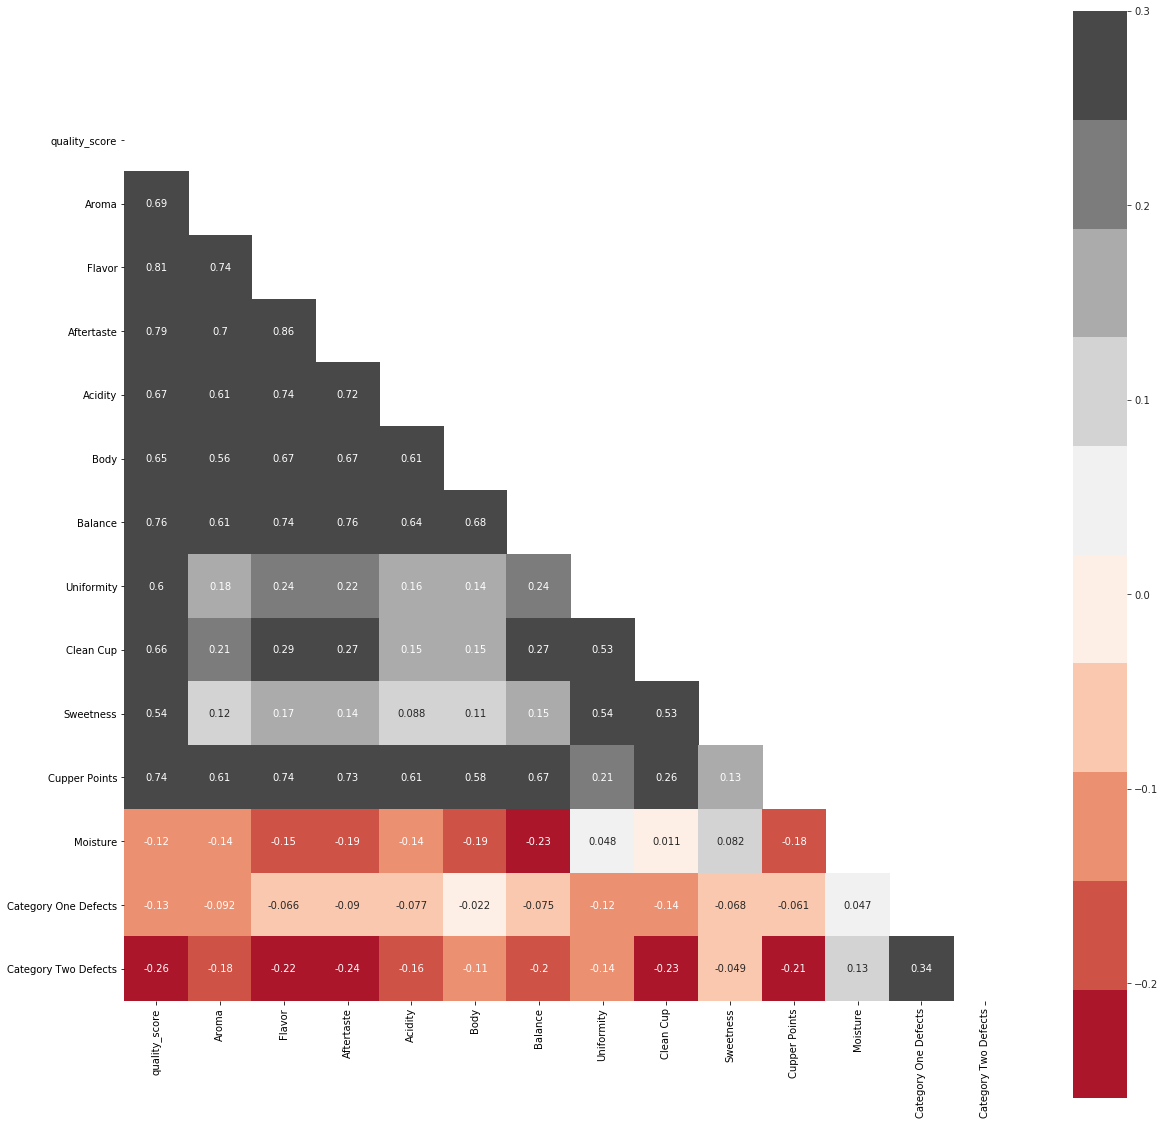

In [272]:
plt.subplots(figsize=(20, 20))
cmap = sns.color_palette("RdGy", 10)
mask = np.zeros_like(arabica1.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(arabica1.corr(), mask=mask, cmap=cmap, vmax=0.3, square=True, annot=True)
plt.show()

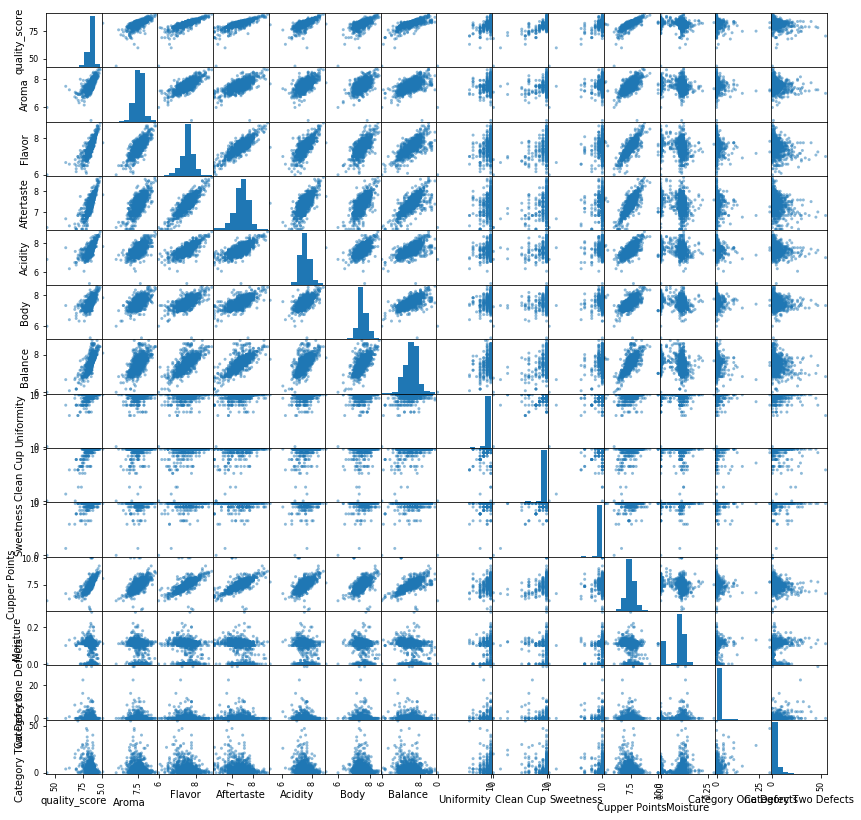

In [273]:
pd.plotting.scatter_matrix(arabica1, figsize=(14,14));

## Robusta Coffee Bean Data

In [32]:
robusta = pd.read_csv('https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/robusta_ratings_raw.csv')

In [33]:
robusta.head()

,Unnamed: 0,quality_score,view_certificate_1,view_certificate_2,Cupping Protocol and Descriptors,View Green Analysis Details,Request a Sample,Species,Owner,Country of Origin,...,Moisture,Category One Defects,Quakers,Color,Category Two Defects,NA.3,Expiration,Certification Body,Certification Address,Certification Contact
0,0,83.75,NaN,NaN,NaN,NaN,NaN,Robusta,Ankole coffee producers coop,Uganda,...,12 %,0 full defects,0,Green,2 full defects,NaN,"June 26th, 2015",Uganda Coffee Development Authority,"Coffee House, Plot 35, Jinja Road, P.O. Box 72...",Clare Rwakatogoro - 256-41-256940/233073
1,0,83.50,NaN,NaN,NaN,NaN,NaN,Robusta,Nishant Gurjer,India,...,0 %,0 full defects,0,NaN,2 full defects,NaN,"October 31st, 2018",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100
2,0,83.25,NaN,NaN,NaN,NaN,NaN,Robusta,Andrew Hetzel,India,...,0 %,0 full defects,0,Green,0 full defects,NaN,"April 29th, 2016",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100
3,0,83.00,NaN,NaN,NaN,NaN,NaN,Robusta,UGACOF,Uganda,...,12 %,0 full defects,0,Green,7 full defects,NaN,"July 14th, 2015",Uganda Coffee Development Authority,"Coffee House, Plot 35, Jinja Road, P.O. Box 72...",Clare Rwakatogoro - 256-41-256940/233073
4,0,83.00,NaN,NaN,NaN,NaN,NaN,Robusta,Katuka Development Trust Ltd,Uganda,...,12 %,0 full defects,0,Green,3 full defects,NaN,"June 26th, 2015",Uganda Coffee Development Authority,"Coffee House, Plot 35, Jinja Road, P.O. Box 72...",Clare Rwakatogoro - 256-41-256940/233073


In [34]:
robusta.tail()

,Unnamed: 0,quality_score,view_certificate_1,view_certificate_2,Cupping Protocol and Descriptors,View Green Analysis Details,Request a Sample,Species,Owner,Country of Origin,...,Moisture,Category One Defects,Quakers,Color,Category Two Defects,NA.3,Expiration,Certification Body,Certification Address,Certification Contact
23,0,78.75,NaN,NaN,NaN,NaN,NaN,Robusta,Luis Robles,Ecuador,...,0 %,0 full defects,0,Blue-Green,1 full defects,NaN,"January 18th, 2017",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100
24,0,78.08,NaN,NaN,NaN,NaN,NaN,Robusta,Luis Robles,Ecuador,...,0 %,0 full defects,0,Blue-Green,0 full defects,NaN,"January 18th, 2017",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100
25,0,77.17,NaN,NaN,NaN,NaN,NaN,Robusta,James Moore,United States,...,0 %,0 full defects,0,NaN,6 full defects,NaN,"December 23rd, 2015",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100
26,0,75.08,NaN,NaN,NaN,NaN,NaN,Robusta,Cafe Politico,India,...,10 %,20 full defects,0,Green,1 full defects,NaN,"August 25th, 2015",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100
27,0,73.75,NaN,NaN,NaN,NaN,NaN,Robusta,Cafe Politico,Vietnam,...,12 %,63 full defects,0,None,9 full defects,NaN,"August 25th, 2015",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100


In [35]:
robusta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 51 columns):
Unnamed: 0                          28 non-null int64
quality_score                       28 non-null float64
view_certificate_1                  0 non-null float64
view_certificate_2                  0 non-null float64
Cupping Protocol and Descriptors    0 non-null float64
View Green Analysis Details         0 non-null float64
Request a Sample                    0 non-null float64
Species                             28 non-null object
Owner                               28 non-null object
Country of Origin                   28 non-null object
Farm Name                           25 non-null object
Lot Number                          6 non-null object
Mill                                20 non-null object
ICO Number                          17 non-null object
Company                             28 non-null object
Altitude                            25 non-null object
Region            

In [40]:
robusta.columns

Index(['Unnamed: 0', 'quality_score', 'view_certificate_1',
       'view_certificate_2', 'Cupping Protocol and Descriptors',
       'View Green Analysis Details', 'Request a Sample', 'Species', 'Owner',
       'Country of Origin', 'Farm Name', 'Lot Number', 'Mill', 'ICO Number',
       'Company', 'Altitude', 'Region', 'Producer', 'Number of Bags',
       'Bag Weight', 'In-Country Partner', 'Harvest Year', 'Grading Date',
       'Owner.1', 'Variety', 'Status', 'Processing Method', 'NA',
       'Fragrance / Aroma', 'Flavor', 'Aftertaste', 'Salt / Acid',
       'Bitter / Sweet', 'Mouthfeel', 'NA.1', 'Uniform Cup', 'Clean Cup',
       'Balance', 'Cupper Points', 'Total Cup Points', 'NA.2', 'Moisture',
       'Category One Defects', 'Quakers', 'Color', 'Category Two Defects',
       'NA.3', 'Expiration', 'Certification Body', 'Certification Address',
       'Certification Contact'],
      dtype='object')

In [42]:
# drop unneeded columns
robusta = robusta.drop(['Unnamed: 0', 'view_certificate_1', 'view_certificate_2', 'Cupping Protocol and Descriptors',  'View Green Analysis Details', 'Request a Sample', 'NA', 'NA.1', 'NA.2', 'NA.3'], axis=1)


In [43]:
robusta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 41 columns):
quality_score            28 non-null float64
Species                  28 non-null object
Owner                    28 non-null object
Country of Origin        28 non-null object
Farm Name                25 non-null object
Lot Number               6 non-null object
Mill                     20 non-null object
ICO Number               17 non-null object
Company                  28 non-null object
Altitude                 25 non-null object
Region                   26 non-null object
Producer                 26 non-null object
Number of Bags           28 non-null int64
Bag Weight               28 non-null object
In-Country Partner       28 non-null object
Harvest Year             28 non-null int64
Grading Date             28 non-null object
Owner.1                  28 non-null object
Variety                  3 non-null object
Status                   28 non-null object
Processing Method   